# __Projet Optimisation enclos mouton__

## __1) Etude du problème d'Optimisation__

### __Réponse 1__

On cherche à optimiser $z = (x_0,...,x_N,y_0,...,y_N)$ qui est de taille $2N + 2 = n$.

### __Réponse 2__

On souhaite maximiser $- J(z) =\frac{1}{2} \sum_{i = 0}^{N-1} (x_{i+1}-x_i)(y_{i+1} + y_i)$ qui représente l'aire de l'enclos.

### __Réponse 3__

On a les contraintes suivantes :

$$g_i(z) = x_{i} - x_{i+1} < 0$$
$$h_i(z) = -y_i \leq 0$$ pour $i = 1$ à $N-1$ et $y_0 = y_N = 0$
et $$\sum_{i = 0}^{N-1} \sqrt{(x_{i+1} - x_i)^2 + (y_{i+1} -y_i)^2} - L = 0$$ 

On peut se contenter de garder que la dernière contrainte que l'on notera $g(z) = 0$

Ansi le problème est $$\min_{z \in \mathbb{R}^n,g(z) = 0} J(z)$$

### __Réponse 4__

Considérons $z_1$ et $z_2$ ainsi que $t \in [0,1]$. On a donc 

$$J(tz_1 + (1-t)z_2) = -\frac{1}{2}\sum_{i=0}^{N-1} \left(t(x_{i+1}^1 - x_i^1) + (1-t)(x_{i+1}^2 - x_i^2) \right) \left(t)(y_{i+1}^1 + y_1^1) + (1-t)(y_{i+1}^2 + y_i^2) \right)$$
$$ = -\frac{1}{2}\sum_{i=0}^{N-1} t^2(x_{i+1}^1 - x_i^1)(y_{i+1}^1 + y_1^1) + (1-t)^2 (x_{i+1}^2 - x_i^2)(y_{i+1}^2 + y_i^2) + t(1-t)(x_{i+1}^1 - x_i^1)(y_{i+1}^2 + y_i^2) + t(1-t)(x_{i+1}^2 - x_i^2)(y_{i+1}^1 + y_1^1)$$
$$ = tJ(z_1) + (1-t)J(z_2) -\frac{t(1-t)}{2}\sum_{i=0}^{N-1} (x_{i+1}^1 - x_i^1)(y_{i+1}^2 + y_i^2) + (x_{i+1}^2 - x_i^2)(y_{i+1}^1 + y_1^1)$$
$$ = tJ(z_1) + (1-t)J(z_2) - H(z_1,z_2)$$

Avec $H(z_1,z_2) = \frac{t(1-t)}{2}\sum_{i=0}^{N-1} (x_{i+1}^1 - x_i^1)(y_{i+1}^2 + y_i^2) + (x_{i+1}^2 - x_i^2)(y_{i+1}^1 + y_1^1)$

A priori $H$ peut être négatif si $\forall k,i \in \{1,2\}\times [0,N] y_i^k < 0$

Or on a les conditions $\forall k,i \in \{1,2\}\times [0,N-1]$ $x_{i+1}^k > x_{i}^k$ et $y_i^k \geq 0$. Sous ces conditions $H$ est tout le temps positif.

Donc $J(tz_1 + (1-t)z_2) \leq tJ(z_1) + (1-t)J(z_2)$

Donc a priori le problème est convexe.

## __2) Résolution numérique__

### __Réponse 5__

In [92]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from scipy.integrate import simps

%matplotlib inline

Si `init_guess` n'est pas donné, on peut l'initialiser avec toutes ses composantes égales à $y_{max} = \frac{L + a - b}{2}$ sauf la première et la dernière a $0$. En effet, dans ce cas la longueur de la corde est < $L$. 

In [4]:
a = 0
b = 10
N = 100

In [112]:
 def J(y,x):
        return -sum((y[i]+y[i+1])*(x[i+1]-x[i]) for i in range(N))
 def g(y,x,L):
        return sum(np.sqrt((y[i+1]-y[i])**2 + (x[i+1]-x[i])**2) for i in range(N)) - L

In [118]:
def optimal_curve(a,b,L,N=40,d=None, init_guess = None):
   

    if d == None:
        d = np.linspace(a,b,N+1,endpoint = True)

    if init_guess == None:
        init_guess = np.array([0]+[(L+a-b)/2]*(N-1)+[0])

    cons = ({'type' : 'eq' , 'fun' : g , 'args' : [d,L]}, {'type' : 'eq' , 'fun' : lambda x : x[0] } , {'type' : 'eq' , 'fun' : lambda x : x[-1] })

    y_opt = opt.minimize(J,y, x,constraints = cons , method = 'SLSQP', options = {'maxiter' : 1000, 'disp' : True})

    return y_opt,d,init_guess
    
    

Optimization terminated successfully    (Exit mode 0)
            Current function value: -121.07233636209722
            Iterations: 140
            Function evaluations: 14508
            Gradient evaluations: 140


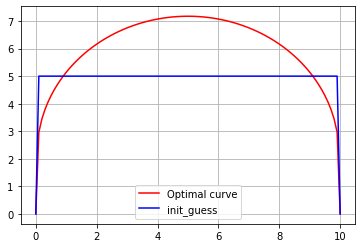

In [119]:
data = optimal_curve(a,b,20,N)

x = data[1]
y = data[0].x


plt.plot(x,y,c = 'r', label = 'Optimal curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend()
plt.grid()
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -319.09816876806707
            Iterations: 102
            Function evaluations: 10585
            Gradient evaluations: 102


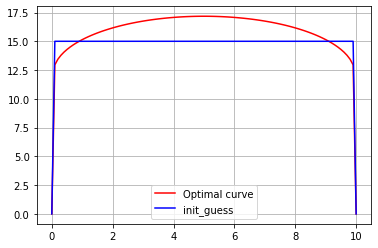

In [115]:
data = optimal_curve(a,b,40,N)

x = data[1]
y = data[0].x


plt.plot(x,y,c = 'r', label = 'Optimal curve')
plt.plot(x,data[2], c = 'b', label = 'init_guess')
plt.legend()
plt.grid()
plt.show()